# Basic use of library

After a successful installation (see Intoduction.ipynb), the library can be imported.

In [1]:
import sys
!{sys.executable} -m pip install ../. --quiet --user #installation of library in local enviorment
from pyRN import pyRN

Reaction networks can be loaded form a text files, please refer to `../netwoks/rn_test.txt` to see an example. Textfiles preserve [antimony](https://http://antimony.sourceforge.net/) general strucutre in terms of reaction and reaction arrows (=> for unidirectional reactions and -> for reversible reaction). So an pyRN object can be created by the following command:

In [2]:
file="../networks/rn_test.txt"
RN = pyRN.from_txt(file)

Alternative sbml files can be loaded:

In [3]:
file="../networks/PW000035.sbml"
RN = pyRN.from_sbml(file,modifiers=True,bond_con=True,rand_bc=False)

The latter inizialization options corresponds to:

- `modifiers`: if consider modifiers species as catalizers
- `bond_con`: if considers boundary condition species as inflow, by adding a reaction
- `rand_bc`: Consider a random selection of the bonday condition species as inflow.

Once the reaction network is inizialized, basic properties can be easily obtained:

In [4]:
print("Vector of species")
print(RN.sp)
print("Vector of species names, in case of an initialization form an smbl file result can be different")
print(RN.sp_n)
print("Display species")
print(RN.sin_print_sp())
print("Display reactions")
print(RN.sin_print_r())
print("Reactive stochiometric matrix")
print(RN.mr)
print("Productive stoichimetric matrix")
print(RN.mp)
print("Stoichiometric Matrix")
print(RN.mp-RN.mr)
print("Inflow species")
print(RN.is_inflow(RN.sp,set_type=True))
print("Outflow species")
print(RN.is_outflow(RN.sp,set_type=True))

Vector of species
['Compound170' 'ProteinComplex320' 'Compound32' 'Compound1632'
 'Compound964' 'Compound1420' 'Compound1973' 'Compound1170'
 'ProteinComplex330' 'ProteinComplex329' 'Compound1104' 'Compound1034'
 'Compound1860' 'Compound1957' 'Compound1065' 'Compound165'
 'ProteinComplex328' 'Compound2109' 'ProteinComplex327' 'Compound414']
Vector of species names, in case of an initialization form an smbl file result can be different
['Pyrophosphate'
 'Ectonucleotide pyrophosphatase/phosphodiesterase family member 1'
 'Adenosine monophosphate' 'Hydroquinone' 'FAD' 'Water'
 '6,7-Dimethyl-8-(1-D-ribityl)lumazine' 'Flavin Mononucleotide'
 'Riboflavin kinase'
 'Low molecular weight phosphotyrosine protein phosphatase' 'Phosphate'
 'Adenosine diphosphate' 'Quinone' 'Dimethylbenzimidazole' 'Oxygen'
 'Riboflavin' 'FAD synthase' '7-Hydroxy-6-methyl-8-ribityl lumazine'
 'Tyrosinase' 'Adenosine triphosphate']
Display species
Species:  {Compound170, ProteinComplex320, Compound32, Compound1632, C

The functions `sin_print_sp()` and `sin_print_r()` can receive as argument `np.arrays` of the elements to be displayed. The `is_inflow()` and `is_outflow()` functions, the `set_type=True` argument is necessary the function display corresponds to an `np.array object` and therefore understandable. 

There are also functions to visualize the network as well as the stoichiometric matrix:

<Figure size 720x360 with 0 Axes>

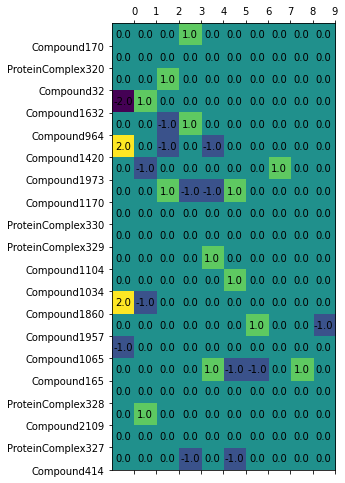

In [5]:
RN.plot_S()
nt=RN.display_RN()
nt.show("RN.html")